# Linear Discriminant Analysis
Redução de dimensionalidade e classificação.

O problema da redução de dimensionalidade consiste em encontrar uma matriz de projeção $W$ *L X D* tal que um ponto **$x$** com *D* features seja projetado num espaço *L* dimensional. Trabalhar em menos dimensões permite acelerar a execução de modelos e também eliminar dados irrelevantes, aumentando a precisão, além de permitir visualização da informação, caso *L* <= 3.

Aqui abordaremos o LDA (*Linear Discriminant Analysis*) e o LDA de Fisher como modelo de classificação e redução de dimensionalidade. Começando pelo caso de duas classes e projeção em um vetor ($L = 1$) e partindo depois para um caso mais geral.

O LDA, diferentemente de outros métodos como o PCA, é um modelo de redução de dimensionalidade supervisionado, que considera as classes das observações ao buscar a melhor projeção, sendo assim apropriado para problemas de classificação.

## Primeiro caso

Começaremos com a seguinte situação: seja $\mathbf{X} = (X_1, ... ,X_n)$ o vetor (matriz) de observações num espaço bi-dimensional, divididas nas classes 1 e 2. Buscamos um vetor $l$ no qual serão projetadas as observações de $\mathbf{X}$. Sendo assim, denotaremos como $\mathbf{Y} = l\mathbf{X}$ o vetor das projeções, $\mathbf{Y_1}$ as projeções da classe 1 e $\mathbf{Y_2}$ as projeções da classe 2.

O LDA busca a projeção que maximize a distância entre as médias das projeções e minimize a variância.

Introduziremos as seguintes notações:
$$
\begin{align}
u_k = \frac{1}{N_k}\sum{x_k^{(i)}} && \text{(média das observações da classe k)} \\
m_k = \frac{1}{N_k}\sum{y_k^{(i)}} && \text{(média das projeções da classe k)} \\
s^2_k = \frac{1}{N_k}\sum{(y_k^{(i)} - m_k)^2} && \text{(variância dentro da classe k)} \\
\end{align}
$$


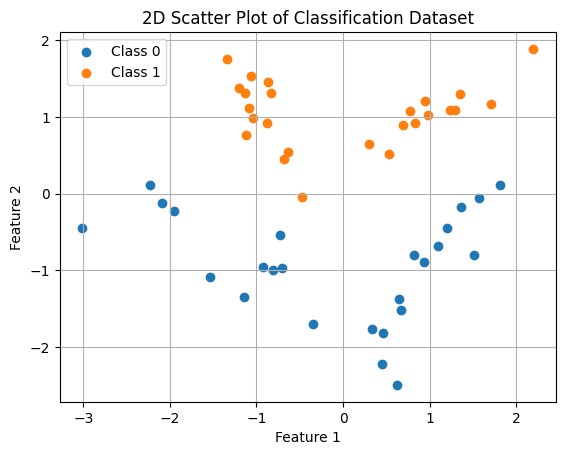

In [146]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import numpy as np

data, target = make_classification(50, 2, n_redundant=0, n_repeated=0)
for class_label in np.unique(target):
    # Select points for each class
    class_points = data[target == class_label]
    plt.scatter(class_points[:, 0], class_points[:, 1], label=f"Class {class_label}")

# Adding labels and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Scatter Plot of Classification Dataset")
plt.legend()
plt.grid(True)
plt.show()



In [147]:
x, x_test, y, y_test = train_test_split(
    data, target, test_size=0.33, random_state=42)
x1 = []
x2 = []
for i in range(x.shape[0]):
    if y[i] == 0:
        x1.append(i)
    else:
        x2.append(i)
x1 = np.array(x1)
x2 = np.array(x2)
u1 = np.mean(x[x1], 0)
u2 = np.mean(x[x2], axis=0)

In [148]:
s1 = np.cov(x[x1], rowvar=False)
s2 = np.cov(x[x2], rowvar=False)
spooled = (x1.shape[0]/x.shape[0])* s1 + (x2.shape[0]/x.shape[0])* s2
spooled.shape
l = np.linalg.inv(spooled) @ (u1 - u2)
projection = l @ x.T
projection = np.outer(projection,l)
comp = ((u1 @ l.T) + (u2 @ l.T))/2



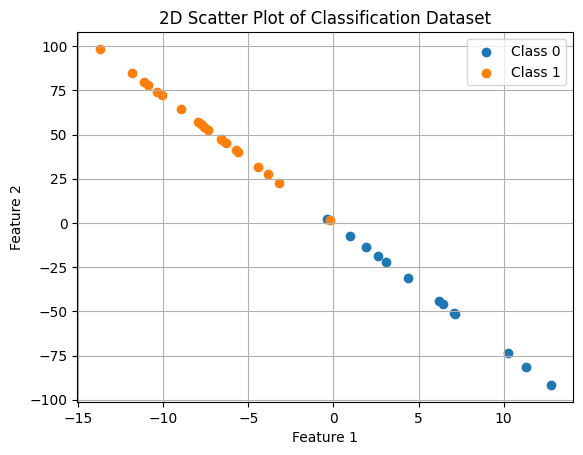

In [149]:

for class_label in np.unique(y):
    # Select points for each class
    class_points = projection[y == class_label]
    plt.scatter(class_points[:,0], class_points[:,1], label=f"Class {class_label}")

# Adding labels and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Scatter Plot of Classification Dataset")
plt.legend()
plt.grid(True)
plt.show()

In [150]:
hit = 0
count = 0
for i in x_test:
  diff_classes =  i @ l.T
  if(diff_classes >= comp):
    classe = 0
  else:
    classe = 1
  if classe == y_test[count]:
    hit +=1
  count +=1
hitrate = hit/x_test.shape[0]
print(hitrate)

0.8823529411764706


In [ ]:
def LDA(x, y,s):

  u = []
  class_count = []
  for c in np.unique(y):
      u.append(np.mean(x[y==c], axis=0))
      class_count.append(x[y==c].shape[0])
  u = np.array(u)
  u_all = np.mean(x, axis=0)

  Sb = np.sum([np.outer(ui - u_all, ui - u_all) * class_count[i] for i, ui in enumerate(u)], axis=0) / x.shape[0]
  Sc = [np.sum([np.outer(xi - u[i], xi - u[i]) for xi in x[y==i]], axis=0) / class_count[i] for i in range(len(class_count))]
  Sw = np.sum([sc * (class_count[i]/ x.shape[0])   for i, sc in enumerate(Sc)], axis=0)

  eigenvalues, eigenvectors = np.linalg.eigh(Sw)
  Sw_inv_sqrt = eigenvectors @ np.diag(1 / np.sqrt(eigenvalues)) @ eigenvectors.T
  Sw_inv_sqrt

  m = Sw_inv_sqrt @ Sb @ Sw_inv_sqrt
  eigenvalues, eigenvectors = np.linalg.eig(m)
  U = eigenvectors[:, :s]
  W = Sw_inv_sqrt @ U

  projection = np.transpose(W.T @ x.T)
  return projection

In [ ]:
iris = load_iris()
x = iris.data
y = iris.target
projection = LDA(x,y,3)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


for class_label in np.unique(y):
    # Select points for each class
    class_points = projection[y == class_label]
    ax.scatter(class_points[:, 0], class_points[:, 1],class_points[:, 2], label= iris.target_names[class_label])

# Adding labels and legend
ax.set_xlabel('autovetor 1')
ax.set_ylabel('autovetor 2')
ax.set_zlabel('autovetor 3')

plt.title("Gráfico 3d do Dataset Iris com redução dimensional(LDA)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
projection = LDA(x,y,2)
ax = plt.subplot()


for class_label in np.unique(y):
    # Select points for each class
    class_points = projection[y == class_label]
    ax.scatter(class_points[:, 0], class_points[:, 1], label= iris.target_names[class_label])

# Adding labels and legend
ax.set_xlabel('autovetor 1')
ax.set_ylabel('autovetor 2')

plt.title("Gráfico 2d do Dataset Iris com redução dimensional(LDA)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
projection = LDA(x,y,2)
ax = plt.subplot()


for class_label in np.unique(y):
    # Select points for each class
    class_points = projection[y == class_label]
    ax.scatter(class_points[:,0], class_points[:,1], label= cancer.target_names[class_label])

# Adding labels and legend
ax.set_xlabel('autovetor 1')
ax.set_ylabel('autovetor 2')

plt.title("Gráfico 2d do Dataset de câncer de mama com redução dimensional(LDA)")
plt.legend()
plt.grid(True)
plt.show()